In [6]:
import pandas as pd
import numpy as np

In [7]:
ratings = pd.read_csv("H:/Specialization/DataScience_2019501092/DADV/Assignments/title.ratings.tsv/data.tsv", delimiter = '\t')
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1700
1,tt0000002,6.1,210
2,tt0000003,6.5,1457
3,tt0000004,6.1,123
4,tt0000005,6.1,2258


In [8]:
basics_movie = pd.read_csv("H:/Specialization/DataScience_2019501092/DADV/Assignments/title.basics.tsv/data.tsv", delimiter = '\t')
basics_movie.head()

C:\Users\shiri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [9]:
basics_movie.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [10]:
basics_movie['startYear'] = pd.to_numeric(basics_movie['startYear'], errors='coerce')
basics_movie.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult            object
startYear         float64
endYear            object
runtimeMinutes     object
genres             object
dtype: object

In [11]:
year = basics_movie[(basics_movie.startYear >= 2000) & (basics_movie.startYear <= 2009)]
year

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
15181,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000.0,\N,60,\N
18034,tt0018295,short,El puño de hierro,El puño de hierro,0,2004.0,\N,40,"Action,Drama,Short"
33808,tt0034413,short,Youth Gets a Break,Youth Gets a Break,0,2001.0,\N,20,Short
34808,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,\N,118,"Comedy,Fantasy,Romance"
35548,tt0036177,movie,Muhomatsu no issho,Muhomatsu no issho,0,2008.0,\N,100,"Action,Adventure"
...,...,...,...,...,...,...,...,...,...
7884818,tt9916794,tvEpisode,Episode #2.33,Episode #2.33,0,2009.0,\N,\N,"Action,Drama,Family"
7884819,tt9916796,tvEpisode,Episode #2.34,Episode #2.34,0,2009.0,\N,\N,"Action,Drama,Family"
7884820,tt9916798,tvEpisode,Episode #2.36,Episode #2.36,0,2009.0,\N,\N,"Action,Drama,Family"
7884821,tt9916800,tvEpisode,Episode #2.35,Episode #2.35,0,2009.0,\N,\N,"Action,Drama,Family"


In [12]:
year_rating_merged = pd.merge(year, ratings, on='tconst')
year_rating_merged.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000.0,\N,60,\N,5.4,11
1,tt0018295,short,El puño de hierro,El puño de hierro,0,2004.0,\N,40,"Action,Drama,Short",6.6,31
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,\N,118,"Comedy,Fantasy,Romance",6.4,79731
3,tt0036177,movie,Muhomatsu no issho,Muhomatsu no issho,0,2008.0,\N,100,"Action,Adventure",7.2,82
4,tt0064730,movie,Japan Organized Crime Boss,Nihon boryoku-dan: Kumicho,0,2000.0,\N,97,"Action,Crime",6.9,188


In [13]:
only_movies = year_rating_merged.loc[year_rating_merged['titleType'] == 'movie']
only_movies

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000.0,\N,60,\N,5.4,11
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,\N,118,"Comedy,Fantasy,Romance",6.4,79731
3,tt0036177,movie,Muhomatsu no issho,Muhomatsu no issho,0,2008.0,\N,100,"Action,Adventure",7.2,82
4,tt0064730,movie,Japan Organized Crime Boss,Nihon boryoku-dan: Kumicho,0,2000.0,\N,97,"Action,Crime",6.9,188
6,tt0079644,movie,November 1828,November 1828,0,2001.0,\N,140,"Drama,War",7.2,30
...,...,...,...,...,...,...,...,...,...,...,...
256003,tt9815124,movie,Mami Jarum,Mami Jarum,0,2002.0,\N,95,Comedy,5.1,22
256049,tt9874290,movie,Star Trek: Incident at Beta 9,Star Trek: Incident at Beta 9,0,2002.0,\N,57,Sci-Fi,4.6,7
256050,tt9876412,movie,Star Trek: The Final Darkness,Star Trek: The Final Darkness,0,2004.0,\N,85,Sci-Fi,4.4,5
256065,tt9881364,movie,Gaja,Gaja,0,2008.0,\N,\N,"Action,Comedy,Romance",7.6,38


In [14]:
popular_movie = only_movies.sort_values('numVotes', ascending = False)
print(popular_movie.head(10)['averageRating'].mean())

8.580000000000002


In [18]:
#Find the year in the 1900s when the average rank increased the most, 
#compared to the previous year.(Ignore movies with votes < 1000)
votes = ratings[ratings['numVotes'] >= 1000]
votes

,tconst,averageRating,numVotes
0,tt0000001,5.7,1700
2,tt0000003,6.5,1457
4,tt0000005,6.1,2258
7,tt0000008,5.4,1874
9,tt0000010,6.9,6320
...,...,...,...
1149856,tt9913050,8.3,1185
1149957,tt9913754,7.2,1010
1149974,tt9914552,9.0,1010
1150029,tt9916270,5.7,1045


In [19]:
votes_merged = pd.merge(votes, basics_movie, on = 'tconst')
year = votes_merged[(votes_merged['startYear'] >= 1900) & (votes_merged['startYear'] < 2000)]
year_output = year.groupby('startYear').agg(avgR = ('averageRating', np.mean)).reset_index()
flag = 0
final_yr = 0
for i in range(1, len(year_output)):
    a = year_output.loc[i, 'avgR']
    b = year_output.loc[i-1, 'avgR']
    temp = abs(a - b)
    if temp > flag:
        flag = temp
        final_yr = year_output.loc[[i], ['startYear']]
final_yr

,startYear
3,1903.0


In [20]:
#Find the expected average rank for 2013 using linear regression. How good is this regression? 
#(Ignore movies with votes < 1000.)
rating_merged = pd.merge(ratings, basics_movie, on = 'tconst')
rating_merged

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.7,1700,short,Carmencita,Carmencita,0,1894.0,\N,1,"Documentary,Short"
1,tt0000002,6.1,210,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,\N,5,"Animation,Short"
2,tt0000003,6.5,1457,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,\N,4,"Animation,Comedy,Romance"
3,tt0000004,6.1,123,short,Un bon bock,Un bon bock,0,1892.0,\N,12,"Animation,Short"
4,tt0000005,6.1,2258,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...,...,...
1150042,tt9916682,5.6,5,tvEpisode,Horrid Henry It's all Your Fault,Horrid Henry It's all Your Fault,0,2012.0,\N,10,"Animation,Comedy,Family"
1150043,tt9916690,6.6,5,tvEpisode,Horrid Henry Delivers the Milk,Horrid Henry Delivers the Milk,0,2012.0,\N,10,"Animation,Comedy,Family"
1150044,tt9916720,6.4,80,short,The Nun 2,The Nun 2,0,2019.0,\N,10,"Comedy,Horror,Mystery"
1150045,tt9916766,6.9,16,tvEpisode,Episode #10.15,Episode #10.15,0,2019.0,\N,43,"Family,Reality-TV"


In [21]:
vote = rating_merged[rating_merged['numVotes']>= 1000]
vote

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.7,1700,short,Carmencita,Carmencita,0,1894.0,\N,1,"Documentary,Short"
2,tt0000003,6.5,1457,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,\N,4,"Animation,Comedy,Romance"
4,tt0000005,6.1,2258,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,\N,1,"Comedy,Short"
7,tt0000008,5.4,1874,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894.0,\N,1,"Documentary,Short"
9,tt0000010,6.9,6320,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895.0,\N,1,"Documentary,Short"
...,...,...,...,...,...,...,...,...,...,...,...
1149855,tt9913050,8.3,1185,tvEpisode,"The Boar Bares Its Fangs, Zenitsu Sleeps","The Boar Bares Its Fangs, Zenitsu Sleeps",0,2019.0,\N,24,"Action,Animation,Fantasy"
1149956,tt9913754,7.2,1010,tvEpisode,Psalm 46:5,Psalm 46:5,0,2020.0,\N,50,"Action,Drama,Fantasy"
1149973,tt9914552,9.0,1010,short,The Curtain,The Curtain,0,2019.0,\N,\N,"Mystery,Short"
1150028,tt9916270,5.7,1045,movie,Il talento del calabrone,Il talento del calabrone,0,2020.0,\N,84,Thriller


In [22]:
vote_output = vote.groupby('startYear').agg(avgR = ('averageRating', np.mean)).reset_index()
vote_output

,startYear,avgR
0,1874.0,6.900000
1,1878.0,7.400000
2,1887.0,5.200000
3,1888.0,6.500000
4,1890.0,5.000000
...,...,...
131,2017.0,7.193242
132,2018.0,7.140431
133,2019.0,7.205714
134,2020.0,7.120890


In [23]:
vote_output = vote_output[vote_output.startYear != 2013]
vote_output

,startYear,avgR
0,1874.0,6.900000
1,1878.0,7.400000
2,1887.0,5.200000
3,1888.0,6.500000
4,1890.0,5.000000
...,...,...
131,2017.0,7.193242
132,2018.0,7.140431
133,2019.0,7.205714
134,2020.0,7.120890


In [24]:
from sklearn.linear_model import LinearRegression

x_train = vote_output['startYear'].values.reshape(-1,1)
y_train = vote_output['avgR'].values.reshape(-1,1)
model = LinearRegression().fit(x_train,y_train)
xtest = np.array([2013]).reshape(-1,1)
prediction = model.predict(xtest)
print(prediction)

[[7.01969428]]


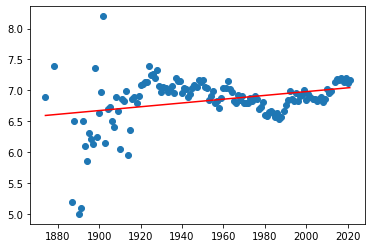

In [25]:
import matplotlib.pyplot as plt  

temp_pred = model.predict(x_train)
plt.scatter(x_train, y_train)
plt.plot(x_train, temp_pred, color='red')
plt.show()

In [26]:
#Find the correlation between rank and votes for each year in the 1900s. 
#By how much did the correlation coefficient grow each year? How good is this regression?

corrl_year = basics_movie[(basics_movie['startYear']>= 1900) & (basics_movie['startYear'] < 2000)]
corrl_Data = pd.merge(ratings, corrl_year, on='tconst')
corrl_Data

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000160,5.4,11,short,The Last Days of Pompeii,The Last Days of Pompeii,0,1900.0,\N,\N,"Drama,Short"
1,tt0000265,4.4,103,short,Above the Limit,Above the Limit,0,1900.0,\N,\N,"Comedy,Short"
2,tt0000269,4.9,100,short,"Army Life; or, How Soldiers Are Made: Mounted ...",Army Life,0,1900.0,\N,\N,"Documentary,Short"
3,tt0000271,6.2,8,short,Arrivée de Pierette et Pierrot,Arrivée de Pierette et Pierrot,0,1900.0,\N,\N,Short
4,tt0000272,5.6,710,short,As Seen Through a Telescope,As Seen Through a Telescope,0,1900.0,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...,...,...
370369,tt9909866,4.3,10,video,Nora,Nora,0,1985.0,\N,45,"Action,Adventure,Animation"
370370,tt9914702,7.2,15,tvEpisode,Episode dated 5 February 1988,Episode dated 5 February 1988,0,1988.0,\N,\N,\N
370371,tt9915498,5.8,6,video,R. Kelly: If I Could Turn Back the Hands of Time,R. Kelly: If I Could Turn Back the Hands of Time,0,1999.0,\N,\N,"Music,Short"
370372,tt9915946,6.2,6,movie,Nuestra película,Nuestra película,0,1993.0,\N,96,Documentary


In [27]:
years = list(corrl_Data['startYear'].unique())
correlation_year = pd.DataFrame()
for year in years:
    X=corrl_Data[corrl_Data['startYear']==year].iloc[:,[1,2]]
    corr = X.corr()
    corr = corr['averageRating'][1]
    newRow = {'Correlation':corr,'Year':year}
    correlation_year = correlation_year.append(newRow, ignore_index=True)
correlation_year = correlation_year.reindex(columns=['Year', 'Correlation'])
correlation_year

,Year,Correlation
0,1900.0,0.233291
1,1901.0,0.260387
2,1902.0,0.206789
3,1903.0,0.166524
4,1904.0,0.275104
...,...,...
95,1997.0,0.020936
96,1999.0,0.028939
97,1998.0,0.022252
98,1994.0,0.034097


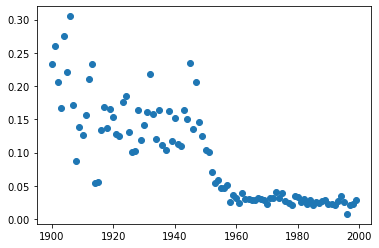

In [28]:
import matplotlib.pyplot
import pylab
matplotlib.pyplot.scatter(correlation_year['Year'],correlation_year['Correlation'])

<BarContainer object of 100 artists>

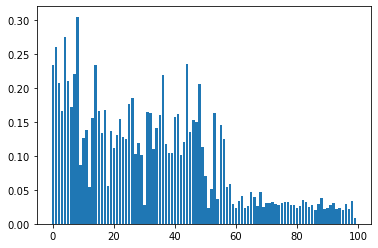

In [29]:
plt.bar(np.arange(len(correlation_year['Year'])), correlation_year['Correlation'])